# Scraping Primary Sources from the Internet Archive

Today we will begin by scraping the Internet Archive, a treasure trove of cultural heritage materials. Access to the Internet Archive collections is not only available through the web-based portal but also via a command-line and Python interface. Documentation about the Internet Archive Python Library, which we will be using in this tutorial, can be found at: https://internetarchive.readthedocs.io/en/latest/index.html

## Setting up your Internet Archive account

In order to webscrape the Internet Archive, you'll first need to create an Internet Archive account.

If you don't already have an account, please make one at https://archive.org/account/login.createaccount.php

Once your account is ready to go, switch to your jupyter notebook directory (it should be open in another tab in your browser window). From here, click "New" in the upper right, then choose "Terminal" from the drop-down menu.

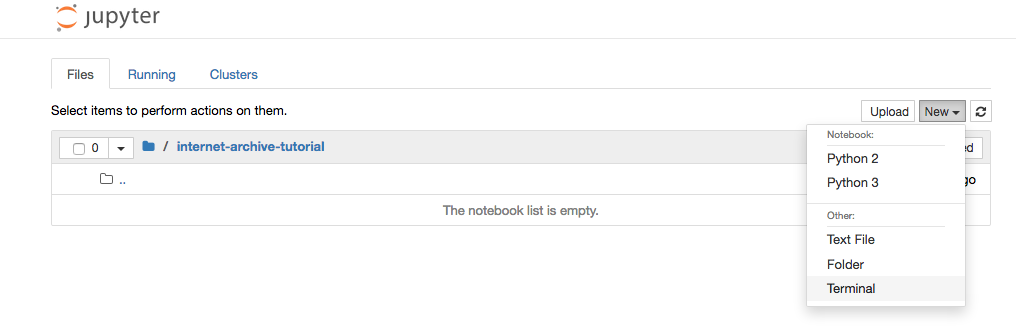

In the terminal window, type `ia configure` and hit `enter`. You will then be prompted to type in your email address and password associated with your Internet Archive account. Note that when you enter your password, even though your keystrokes do not appear in the terminal window, they are being recorded. Once you're done typing your password, even though it doesn't appear on the screen, hit `enter`.

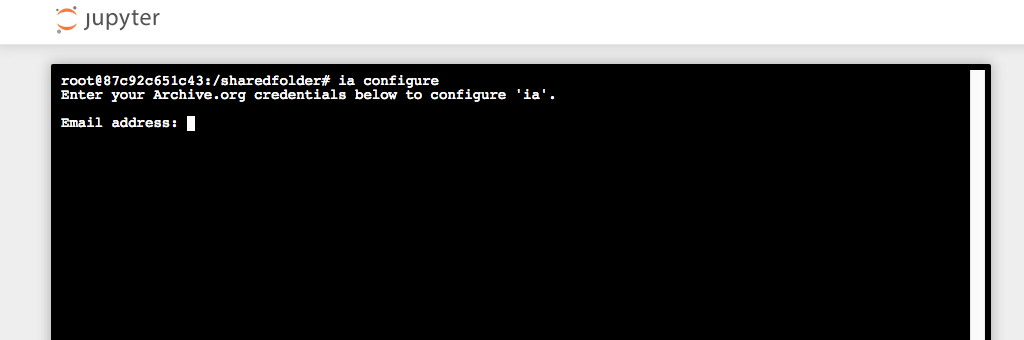

Once you've logged in, you'll be able to communicate directly with the Internet Archive while running the Python application. This facilitates searching and webscraping collections across the Internet Archive. 

To learn more about the Internet Archive Python Library, check out https://internetarchive.readthedocs.io/en/latest/index.html

## Accessing an Internet Archive Collection in Python

Now that everything is set up with your account, you're ready to explore and webscrape collections throughout the Internet Archive!

For today's workshop, we will be focusing on the John Carter Brown Library's Venezuela collection https://archive.org/details/jcbvenezuela. This collection consists of 20 primary sources printed shortly after the first printing press arrived in Venezuela in 1808 and the wars of independence (1810-1823). It is important to note that these items are exclusively held by the John Carter Brown Library and no other copies exist at other institutions. Thus, this collection of primary sources is unique and is of potentially great research value for scholars of nineteenth-century Venezuela.

Note that this is a fairly small collection of only approximately 20 documents and books. 
When webscraping, you are generally dealing with large collections (i.e. collections containing hundreds or thousands of items that trying to download manually one by one would be impractical, not to mention mind-numbingly tedious). 

For the sake of this short workshop, we will be working with a small collection because webscraping large collections can take several hours. Even though we're working with a small collection, note that all the steps in this tutorial can be scaled up to handle much larger collections.

All Internet Archive (IA) collections and items are assigned unique identifiers, and collection and item-specific URLs contain that identifier:

http://archive.org/details/[IDENTIFIER]


In the case of the JCB Venezuela Collection, the collection URL is: https://archive.org/details/jcbvenezuela

The specific collection identifier we will be working with is `jcbvenezuela`.


Let's start by searching the number of items in this collection:

In [1]:
import internetarchive
search = internetarchive.search_items('collection:jcbvenezuela')
print(search.num_found)

20


You can also see how many items are in the umbrella collection that the Venezuela collection is a part of. Try inputting `jcbspanishamerica` instead of `jcbvenezuela` in the function below. How many items appear now?


In [2]:
search = internetarchive.search_items('collection:jcbspanishamerica')
print(search.num_found)

4211


Let's switch back to the `jcbvenezuela` collection. We have to reset our search variable to specify this collection.


In [3]:
search = internetarchive.search_items('collection:jcbvenezuela')

We were able to verify that our collection consists of 20 items. What are the unique identifiers for each of these items? Let's find out!

In [4]:
for result in search:
   print(result['identifier'])

actadelainstalac00vene
collectionofdocu00none
constitucionfede00vene
donpablomorillot00mori
dpablomorilloten00mori
elcongresogenera00colo_0
elcongresogenera00colo_1
elfuegoelectrico00unkn
elmuyilustreayun00cara
elvenezolano00unkn
incluyovderdende00rosc
joseantonioravel00rave
lajuntagubernati00cara
lasaluddelestado00rosc
manifestoquehace00vene
manifiestoquehac00muoz
memoriasobreelde00rafn
porhaberseretira00rosc
sesiondeldia5ded00vene
venesolanosqueha00mori


If you were to run this command with the larger Spanish America collection, Python would print out a running list of thousands of ID hits. Fortunately, we're only dealing with 20 items so this won't be an issue. ^_^

## Webscraping the JCB Venezuela Collection

### 1. Scraping all the files associated with an IA book

Now that we've learned how to navigate a bit through the IA collections, we're ready to try our hand at scraping files at both the item and collection level. 

Let's begin on the item level and scrape all the files the IA makes available for a particular book in the JCB Venezuela collection. 

The book we'll be scraping is an 1811 imprint of "Manifesto que hace al mundo la confederacion de Venezuela en la America meridional..." unique ID: `manifestoquehace00vene` and available at https://archive.org/details/manifestoquehace00vene

We'll start by making a folder to keep all the materials we scrape from the IA organized in our shared folder.

In [ ]:
import os
!mkdir -p JCB-Venezuela-Collection
os.chdir('JCB-Venezuela-Collection')

Open a new browser window and go to https://archive.org/details/manifestoquehace00vene Notice the "download options" on the right hand side of the page. We are going to bulk download all of these files containing metadata of the book we're interested in.

In [ ]:
from internetarchive import download
item = internetarchive.get_item('manifestoquehace00vene')
item.download()

Your computer is downloading all of the files associated with that item, including some pretty large images. But when it’s done downloading, you should see a new folder called `manifestoquehace00vene` in the `JCB-Venezuela-Collection` folder. To check, navigate to that folder on your computer. 

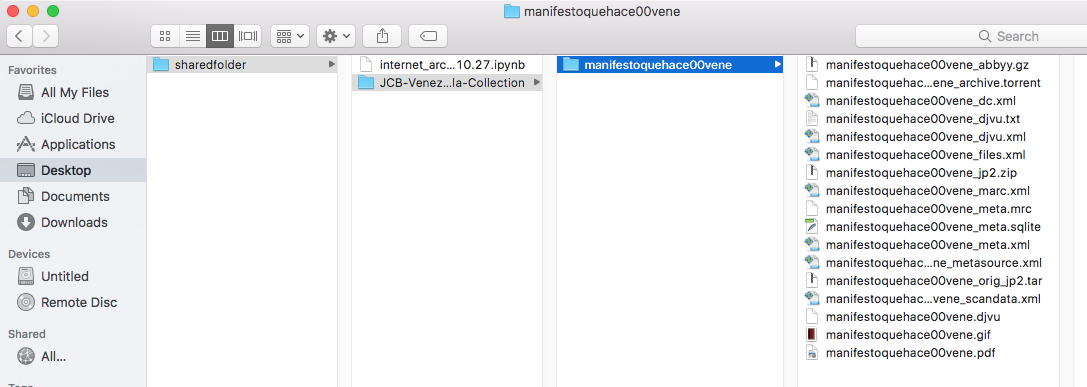

### 2. Scraping PDFs of all items in the collection

Scraping the files associated with one item on the IA is nice, but what if we want to download thousands of items in a collection or across collections? We’re in luck, because the IA python module's `Search` function allows us to iterate over all the results in a search and download specific item files that are pertinent to our research needs.

We'll go ahead and download PDFs of all 20 items in the `jcb venezuela` collection. Note that this step may take several minutes to complete.

Remember that this function can be scaled up to work with much larger collections, but the larger the collection, the longer the download time. If you plan to scrape a very large collection (say, containing thousands of items), make sure you have enough disk memory and time alotted for that bulk download!


In [ ]:
import internetarchive 

search = internetarchive.search_items('collection:jcbvenezuela')

for result in search:
    itemid = result['identifier']
    item = internetarchive.get_item(itemid)
    pdf = item.get_file(itemid + '.pdf')
    pdf.download()
    print ("Downloading " + itemid + " ...")

Check your `JCB-Venezuela-Collection` folder. You should now have 20 PDFs of complete digital facsimiles from the JCB Venezuela collection!